In [1]:
import numpy as np
import pandas as pd
import math
from sklearn import metrics

from scipy.stats import entropy

import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.dates as mdates #to format dates on our plots
%matplotlib inline
import seaborn as sns

# This is to make sure matplotlib doesn't throw the following error:
# The next line fixes "TypeError: float() argument must be a string or a number, not 'Timestamp' matplotlib"
pd.plotting.register_matplotlib_converters()

In [2]:
import acquire as a

def get_curric_data():
    df = pd.read_csv('anonymized-curriculum-access.txt', sep=" ", header=None)
    df['time_stamp'] = df[0] + ' ' + df[1]
    df = df.drop(columns = [0,1])
    df = df.rename(columns={2: "page", 3:'user_id', 4:'cohort_id', 5:'ip'})
    df.time_stamp = pd.to_datetime(df.time_stamp)
    df = df.set_index('time_stamp')
    return df

In [3]:
df = a.get_curric_data()
df.head()

,page,user_id,cohort_id,ip
time_stamp,,,,
2018-01-26 09:55:03,/,1,8.0,97.105.19.61
2018-01-26 09:56:02,java-ii,1,8.0,97.105.19.61
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 719459 entries, 2018-01-26 09:55:03 to 2020-11-02 16:48:47
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   page       719458 non-null  object 
 1   user_id    719459 non-null  int64  
 2   cohort_id  674619 non-null  float64
 3   ip         719459 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 27.4+ MB


In [5]:
df.cohort_id.isnull().value_counts()
674619 + 44840

719459

In [6]:
df.page.isnull().sum()

1

In [7]:
df.page.dropna(inplace=True)

In [10]:
df.page.isnull().sum()

1

cohort_id,name,start_date,end_date,program_id
1,Arches,2014-02-04,2014-04-22,1
2,Badlands,2014-06-04,2014-08-22,1
3,Carlsbad,2014-09-04,2014-11-05,1
4,Denali,2014-10-20,2015-01-18,1
5,Everglades,2014-11-18,2015-02-24,1
6,Franklin,2015-02-03,2015-05-26,1
7,Glacier,2015-06-05,2015-10-06,1
8,Hampton,2015-09-22,2016-02-06,1
9,Apollo,2015-03-30,2015-07-29,4
10,Balboa,2015-11-03,2016-03-11,4
11,Ike,2016-01-20,2016-05-12,1
12,Joshua,2016-03-08,2016-06-30,1
13,Kings,2016-05-23,2016-09-15,1
14,Lassen,2016-07-18,2016-11-10,1
15,Mammoth,2016-09-26,2017-02-02,2
16,Niagara,2016-10-26,2017-03-09,2
17,Olympic,2017-02-06,2017-05-25,1
18,Pinnacles,2017-03-27,2017-07-20,2
19,Quincy,2017-06-05,2017-09-22,1
20,Redwood,2017-07-31,2017-12-06,2
21,Sequoia,2017-09-27,2018-02-15,2
22,Teddy,2018-01-08,2018-05-17,2
23,Ulysses,2018-03-05,2018-07-19,2
24,Voyageurs,2018-05-29,2018-10-11,2
25,Wrangell,2018-07-23,2018-11-29,2
26,Xanadu,2018-09-17,2019-02-08,2
27,Yosemite,2018-11-05,2019-04-03,2
28,Staff,2014-02-04,2014-02-04,2
29,Zion,2019-01-22,2019-06-04,2
30,Ada,2019-02-04,2019-06-16,3
31,Andromeda,2019-03-18,2019-07-30,2
32,Betelgeuse,2019-05-28,2019-10-08,2
33,Ceres,2019-07-15,2019-12-11,2
34,Bayes,2019-08-19,2020-01-30,3
51,Deimos,2019-09-16,2020-02-27,2
52,Europa,2019-11-04,2020-04-17,2
53,Fortuna,2020-01-13,2020-06-23,2
55,Curie,2020-02-03,2020-07-07,3
56,Apex,2020-02-24,2020-07-29,2
57,Ganymede,2020-03-23,2020-08-20,2
58,Hyperion,2020-05-26,2020-11-10,2
59,Darden,2020-07-13,2021-01-12,3
60,Io,2020-07-20,2021-01-21,2
61,Bash,2020-07-20,2021-01-21,2
62,Jupiter,2020-09-21,2021-03-30,2
132,Kalypso,2020-11-02,2021-05-04,2


In [17]:
df['is_ds'] = df.cohort_id.isin([30,34,55,59])


In [18]:
df.head()

,page,user_id,cohort_id,ip,is_ds
time_stamp,,,,,
2018-01-26 09:55:03,/,1,8.0,97.105.19.61,False
2018-01-26 09:56:02,java-ii,1,8.0,97.105.19.61,False
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,False
2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,False
2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,False


# Which lesson appears to attract the most traffic consistently across cohorts (per program)?

In [19]:
df['times_accessed'] = 1

In [21]:
# Shows how many times the ciriculum was accessed monthly
df[['times_accessed']].resample('m').sum().tail()

,times_accessed
time_stamp,
2020-07-31,36540
2020-08-31,33314
2020-09-30,30806
2020-10-31,29966
2020-11-30,2092


<AxesSubplot:xlabel='time_stamp'>

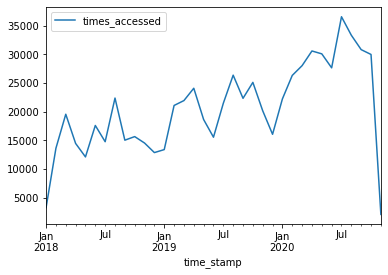

In [23]:
df[['times_accessed']].resample('m').sum().plot()

In [32]:
df.groupby(['times_accessed','cohort_id']).count()

page  user_id     ip  is_ds
times_accessed cohort_id                              
1              1.0         8884     8884   8884   8884
               2.0           93       93     93     93
               4.0            4        4      4      4
               5.0            1        1      1      1
               6.0           72       72     72     72
               7.0          495      495    495    495
               8.0         1712     1712   1712   1712
               9.0            5        5      5      5
               11.0         208      208    208    208
               12.0         302      302    302    302
               13.0        2733     2733   2733   2733
               14.0        9495     9495   9495   9495
               15.0         691      691    691    691
               16.0         743      743    743    743
               17.0        4925     4925   4925   4925
               18.0        2005     2005   2005   2005
               19.0        1165     1165   1165   1165
               21.0        7444     7444   7444   7444
               22.0       30328    30328  30328  30328
               23.0       28329    28329  28329  28329
               24.0       35624    35624  35624  35624
               25.0       25427    25427  25427  25427
               26.0       27637    27637  27637  27637
               27.0       20447    20447  20447  20447
               28.0       60315    60315  60315  60315
               29.0       37548    37548  37548  37548
               31.0       25253    25253  25253  25253
               32.0       28333    28333  28333  28333
               33.0       40168    40168  40168  40168
               34.0       25181    25181  25181  25181
               51.0       29688    29688  29688  29688
               52.0       27518    27518  27518  27518
               53.0       36047    36047  36047  36047
               55.0       20410    20411  20411  20411
               56.0       31670    31670  31670  31670
               57.0       32447    32447  32447  32447
               58.0       28354    28354  28354  28354
               59.0       22425    22425  22425  22425
               61.0       11774    11774  11774  11774
               62.0        8718     8718   8718   8718

In [43]:
df2 = df.groupby(['page', 'cohort_id'])['times_accessed'].sum().reset_index()

In [54]:
df2.head(20)

,page,cohort_id,times_accessed
0,%20https://github.com/RaulCPena,55.0,1
1,",%20https://github.com/RaulCPena",55.0,1
2,.git,24.0,1
3,.gitignore,24.0,1
4,.well-known/assetlinks.json,58.0,2
5,/,1.0,622
6,/,2.0,17
7,/,4.0,1
8,/,5.0,1
9,/,6.0,4


In [57]:
# Dropping all request to the home page. drop toc, search
df2 = df2[df2.page != '/']

In [61]:
df2 = df2[df2.page != 'toc']

In [62]:
df2.head()

,page,cohort_id,times_accessed
0,%20https://github.com/RaulCPena,55.0,1
1,",%20https://github.com/RaulCPena",55.0,1
2,.git,24.0,1
3,.gitignore,24.0,1
4,.well-known/assetlinks.json,58.0,2


In [63]:
df2 = df2.sort_values(by= 'cohort_id', ascending = False)
df2.head()
df2 = df2[]

,page,cohort_id,times_accessed
7094,java-i,62.0,22
3342,assets/js/pdfmake.min.js.map,62.0,4
10629,slides/introduction_to_java,62.0,1
6622,html-css/css-i/flexbox/flexbox-in-practice,62.0,159
8104,javascript-i/bom-and-dom/dom-events,62.0,10


In [60]:
df2.head()

,page,cohort_id,times_accessed
0,%20https://github.com/RaulCPena,55.0,1
1,",%20https://github.com/RaulCPena",55.0,1
2,.git,24.0,1
3,.gitignore,24.0,1
4,.well-known/assetlinks.json,58.0,2


In [42]:
df.describe()

,user_id,cohort_id,times_accessed
count,719459.000000,674619.000000,719459.0
mean,392.945478,37.173660,1.0
std,211.655544,14.971385,0.0
min,1.000000,1.000000,1.0
25%,230.000000,26.000000,1.0
50%,417.000000,32.000000,1.0
75%,568.000000,53.000000,1.0
max,787.000000,62.000000,1.0


In [45]:
df2.describe()

,cohort_id,times_accessed
count,11780.000000,11780.000000
mean,30.401273,57.268081
std,16.559253,130.288566
min,1.000000,1.000000
25%,19.000000,2.000000
50%,28.000000,6.000000
75%,34.000000,51.000000
max,62.000000,4633.000000


In [109]:
# Creating pages accessed data frame to see how many times ds students hit different pages

# sorting by the times accessed from highest to lowest
ds_pgs_accessed_df = df2.sort_values(by = 'times_accessed', ascending=False)

# adding mask to destinguish between ds and web_dev students
ds_pgs_accessed_df['is_ds'] = ds_pgs_accessed_df.cohort_id.isin([30,34,55,59])

# Selecting only ds students
ds_pgs_accessed_df = ds_pgs_accessed_df[ds_pgs_accessed_df.is_ds == True]

ds_pgs_accessed_df.head(10)

,page,cohort_id,times_accessed,is_ds
3470,classification/overview,59.0,759,True
180,1-fundamentals/modern-data-scientist.jpg,34.0,626,True
157,1-fundamentals/AI-ML-DL-timeline.jpg,34.0,624,True
80,1-fundamentals/1.1-intro-to-data-science,34.0,615,True
1226,6-regression/1-overview,55.0,595,True
3491,classification/scale_features_or_not.svg,59.0,590,True
10355,search/search_index.json,34.0,551,True
1225,6-regression/1-overview,34.0,521,True
11342,sql/mysql-overview,59.0,513,True
10359,search/search_index.json,55.0,480,True


## **Which lesson appears to attract the most traffic consistently across cohorts (per program)?**
For data science, the top five pages viewed across any cohort were 
1. classification/overview - cohort 59 with 759 views
2. 1-fundamentals/modern-data-scientist.jpg - cohort 34 with 626 views
3. 1-fundamentals/AI-ML-DL-timeline.jpg	- cohort 34 with 624 views
4. 1-fundamentals/1.1-intro-to-data-science	- cohort 34 with 615 views
5. 6-regression/1-overview - cohort 55 with 595 views

**ADA 30**
1. No data

**Bayes 34**
1. 1-fundamentals/modern-data-scientist.jpg - views 626
2. 1-fundamentals/AI-ML-DL-timeline.jpg - views 624
3. 1-fundamentals/1.1-intro-to-data-science - views 615

**Curie 55**
1. 6-regression/1-overview - views 595
1. 1-fundamentals/modern-data-scientist.jpg - views 467
2. 1-fundamentals/AI-ML-DL-timeline.jpg - views 465

**Darden 59**
1. classification/overview - views 759
2. classification/scale_features_or_not.svg - views 590
3. sql/mysql-overview - views 513

In [84]:
# Just ADA. No data showing in ada
df2.sort_values(by = 'times_accessed', ascending=False)
df2.cohort_id.value_counts()

28.0    1319
22.0     529
14.0     476
34.0     449
25.0     415
55.0     397
23.0     397
17.0     381
24.0     375
61.0     371
31.0     364
59.0     349
13.0     341
1.0      340
32.0     325
18.0     315
21.0     310
29.0     307
27.0     304
33.0     295
57.0     287
26.0     278
19.0     278
8.0      276
51.0     267
58.0     266
52.0     261
56.0     258
53.0     249
15.0     230
62.0     156
16.0     132
7.0      128
12.0     115
11.0      74
6.0       44
2.0       42
4.0        3
9.0        3
Name: cohort_id, dtype: int64

In [ ]:
df2 = df2[df2.page != 'search/search_index.json']

In [90]:
# Creating pages accessed data frame to see how many times ds students hit different pages

# sorting by the times accessed from highest to lowest
wdev_pgs_accessed_df = df2.sort_values(by = 'times_accessed', ascending=False)

# adding mask to destinguish between ds and web_dev students
wdev_pgs_accessed_df['is_ds'] = wdev_pgs_accessed_df.cohort_id.isin([30,34,55,59])

# Selecting only ds students
wdev_pgs_accessed_df = wdev_pgs_accessed_df[wdev_pgs_accessed_df.is_ds == False]

# Going to drop search/search_index.json as it adds no value in regards to the curriculum

wdev_pgs_accessed_df = wdev_pgs_accessed_df[wdev_pgs_accessed_df.page != 'search/search_index.json']
wdev_pgs_accessed_df.head(5)

,page,cohort_id,times_accessed,is_ds
7888,javascript-i,28.0,1263,False
1794,appendix,28.0,989,False
7892,javascript-i,33.0,977,False
6462,html-css,28.0,977,False
10863,spring,28.0,914,False


## **Which lesson appears to attract the most traffic consistently across cohorts (per program)?**
For **WebDev**, the top five pages viewed per any cohort were 
1. javascript-i	 - cohort 28 with 1263 views
2. appendix - cohort 28 with 989 views
3. javascript-i	- cohort 33 with 977 views
4. html-css	- cohort 28 with 977 views
5. spring - cohort 28 with 914 views
6. java-iii - cohort 28 with 908 views

In [51]:
df2.groupby(['cohort_id'])['times_accessed'].max()

cohort_id
1.0      622
2.0       17
4.0        1
5.0        1
6.0       10
7.0       34
8.0      210
9.0        2
11.0      12
12.0      19
13.0     208
14.0     877
15.0      33
16.0      65
17.0     244
18.0     129
19.0     138
21.0     630
22.0    1754
23.0    1618
24.0    2098
25.0    1112
26.0     916
27.0     962
28.0    4633
29.0    1756
31.0    1156
32.0     868
33.0    1620
34.0    1842
51.0    1319
52.0    1223
53.0    1962
55.0    1523
56.0    1361
57.0    1618
58.0    1245
59.0    2041
61.0     532
62.0     762
Name: times_accessed, dtype: int64

### Takeaway: Cohort 28 had the most hits at 4633, followed by cohort 24, then darden cohort 59. 

In [89]:
my_ip = '162.197.239.66'
df[df.ip == my_ip]

,page,user_id,cohort_id,ip,is_ds,times_accessed
time_stamp,,,,,,
2020-07-13 14:49:30,/,695,59.0,162.197.239.66,True,1
2020-07-14 15:04:52,/,695,59.0,162.197.239.66,True,1
2020-07-14 15:10:04,1-fundamentals/1.1-intro-to-data-science,695,59.0,162.197.239.66,True,1
2020-07-14 15:10:04,1-fundamentals/AI-ML-DL-timeline.jpg,695,59.0,162.197.239.66,True,1
2020-07-14 15:10:04,1-fundamentals/modern-data-scientist.jpg,695,59.0,162.197.239.66,True,1
...,...,...,...,...,...,...
2020-10-29 06:37:30,regression/project,695,59.0,162.197.239.66,True,1
2020-10-29 06:43:35,regression/feature-engineering,695,59.0,162.197.239.66,True,1
2020-10-29 10:18:10,timeseries/explore,695,59.0,162.197.239.66,True,1


# Is there a cohort that referred to a lesson significantly more that other cohorts seemed to gloss over? 
- Going to compare the top five viewed cohort pages and compare to how all other cohorts viewed those pages

In [101]:
ds_pgs_accessed_df.head()

,page,cohort_id,times_accessed,is_ds
3470,classification/overview,59.0,759,True
180,1-fundamentals/modern-data-scientist.jpg,34.0,626,True
157,1-fundamentals/AI-ML-DL-timeline.jpg,34.0,624,True
80,1-fundamentals/1.1-intro-to-data-science,34.0,615,True
1226,6-regression/1-overview,55.0,595,True


In [106]:
ds_pgs_accessed_df[ds_pgs_accessed_df.page .isin(["classification/overview"])]

,page,cohort_id,times_accessed,is_ds
3470,classification/overview,59.0,759,True
3469,classification/overview,55.0,91,True
3468,classification/overview,34.0,10,True


### Our cohort looked at classification overview significantly more than all other cohorts.

In [107]:
ds_pgs_accessed_df[ds_pgs_accessed_df.page .isin(["1-fundamentals/modern-data-scientist.jpg"])]

,page,cohort_id,times_accessed,is_ds
180,1-fundamentals/modern-data-scientist.jpg,34.0,626,True
182,1-fundamentals/modern-data-scientist.jpg,59.0,470,True
181,1-fundamentals/modern-data-scientist.jpg,55.0,467,True


## 1-fundamentals/modern-data-scientist.jpg seemed to be evenly distributed 

In [108]:
ds_pgs_accessed_df[ds_pgs_accessed_df.page .isin(["1-fundamentals/AI-ML-DL-timeline.jpg"])]

,page,cohort_id,times_accessed,is_ds
157,1-fundamentals/AI-ML-DL-timeline.jpg,34.0,624,True
159,1-fundamentals/AI-ML-DL-timeline.jpg,59.0,470,True
158,1-fundamentals/AI-ML-DL-timeline.jpg,55.0,465,True


## 1-fundamentals/modern-data-scientist.jpg seemed to be evenly distributed

In [110]:
ds_pgs_accessed_df[ds_pgs_accessed_df.page .isin(["1-fundamentals/1.1-intro-to-data-science"])]

,page,cohort_id,times_accessed,is_ds
80,1-fundamentals/1.1-intro-to-data-science,34.0,615,True
81,1-fundamentals/1.1-intro-to-data-science,55.0,461,True
82,1-fundamentals/1.1-intro-to-data-science,59.0,460,True


## 1-fundamentals/1.1-intro-to-data-science seemed to be evenly distributed

In [111]:
ds_pgs_accessed_df[ds_pgs_accessed_df.page .isin(["6-regression/1-overview"])]

,page,cohort_id,times_accessed,is_ds
1226,6-regression/1-overview,55.0,595,True
1225,6-regression/1-overview,34.0,521,True
1227,6-regression/1-overview,59.0,7,True


## 6-regression/1-overview Darden barely accessed the regression overview like Bayes or Curie